In this project, we are going to visualize our data by using scatter plot. We try to correlate between total confirmed cases against total victims died due to Covid-19 in some Indonesian provinces. However, I am also adding population of each province as my third variable, just to make them like bubble plot. So firstly, let's import our library to be used in this project.

In [1]:
import pandas as pd                      #For importing our datasets
import matplotlib.pyplot as plt          #To visualize our data
import numpy as np                       #To do an array operation
from sklearn import linear_model as lm   #To build the linear regression model 
plt.style.use("ggplot")                  #To set the style as "ggplot" in R

Firstly, we are going to import our dataset by using Pandas. 
The dataset was obtained from these resources: 

1.) For Confirmed_cases, Recovered_cases, and Death_cases (7 July 2020): https://data.humdata.org/dataset/indonesia-covid-19-cases-recoveries-and-deaths-per-province

2.) For Populations: https://www.bps.go.id/statictable/2014/02/18/1274/proyeksi-penduduk-menurut-provinsi-2010---2035.html

In [2]:
df = pd.read_excel("idn-covid-7-july-2020.xlsx")

df.head()

,Type,Features Type,ID-number,Province_code,Province_name,Confirmed_cases,Recovered_cases,Death_cases,Populations,Features Geometry Type,Features Geometry Coordinates
0,FeatureCollection,Feature,1,11,Aceh,87,31,3,5459.9,Point,"96.90952274800009,4.225081892000048"
1,FeatureCollection,Feature,2,12,Sumatera Utara,1778,478,103,14703.5,Point,"99.05788784900005,2.184779215000049"
2,FeatureCollection,Feature,3,13,Sumatera Barat,775,625,31,5498.8,Point,"100.46680503000005,-0.85191434799998"
3,FeatureCollection,Feature,4,14,Riau,234,208,10,7128.3,Point,"101.81289195400007,0.510525849000032"
4,FeatureCollection,Feature,5,15,Jambi,120,81,10,3677.9,Point,"103.59932,-1.61775"


However, we only choose some variables in our experiment. I only filtered some columns such as Province_name, Confirmed_cases, Recovered_cases, Death_cases, and Populations.

In [3]:
dacov = df.loc[:, "Province_name" : "Populations"]
dacov.head()

,Province_name,Confirmed_cases,Recovered_cases,Death_cases,Populations
0,Aceh,87,31,3,5459.9
1,Sumatera Utara,1778,478,103,14703.5
2,Sumatera Barat,775,625,31,5498.8
3,Riau,234,208,10,7128.3
4,Jambi,120,81,10,3677.9


Next, we need to check whether there are some missing values in our datasets. By using notnull(), it would return "True", if the value was not missing. From the results we found that the number of True for each column is 33, meaning that all columns have no missing values.

In [4]:
print("The number of data sets :", df.shape[0])

for i in range(5):
    
    x = dacov.iloc[:,i].notnull().value_counts()   
    
    print(x)

The number of data sets : 33
True    33
Name: Province_name, dtype: int64
True    33
Name: Confirmed_cases, dtype: int64
True    33
Name: Recovered_cases, dtype: int64
True    33
Name: Death_cases, dtype: int64
True    33
Name: Populations, dtype: int64


We will also conduct the descriptive statistics to see the mean, median, minimum, and maximum value. 

In [5]:
dacov.describe()

,Confirmed_cases,Recovered_cases,Death_cases,Populations
count,33.000000,33.000000,33.000000,33.000000
mean,1925.030303,876.515152,96.333333,8214.133333
std,3239.693383,1524.029448,205.685237,11391.291418
min,87.000000,31.000000,1.000000,981.800000
25%,234.000000,163.000000,8.000000,2528.800000
50%,775.000000,300.000000,16.000000,4380.800000
75%,1849.000000,942.000000,87.000000,8521.200000
max,14013.000000,7663.000000,1020.000000,49935.700000


We will also fetch another dataset for the top 5 provinces with the high death cases due to Covid-19 in Indonesia

In [6]:
dacov.sort_values(by = "Death_cases", ascending = False).head()

,Province_name,Confirmed_cases,Recovered_cases,Death_cases,Populations
14,Jawa Timur,14013,4892,1020,39886.3
10,DKI Jakarta,12435,7663,649,10645.0
21,Kalimantan Selatan,3564,942,200,4304.0
12,Jawa Tengah,4611,1507,200,34940.1
25,Sulawesi Selatan,5890,2118,199,8928.0


In [7]:
#dacov = np.log(dacov.loc[:, "Confirmed_cases":"Populations"])

We are going to visualize our data by using scatter plots. X-Axis will be labelled as total confirmed cases, Y-Axis will be labelled as total patients died. Besides, we also use the population size to resize the plot. We also include the dataset for the top 5 provinces with the high death rate. As we can see, those five provinces namely Jawa timur (1020 death cases), DKI Jakarta (649 death cases), Kalimantan Selatan (200 death cases), Jawa Tengah (200 death cases), and Sulawesi Selatan (199 death cases).

Text(5890, 150, 'Sulawesi Selatan')

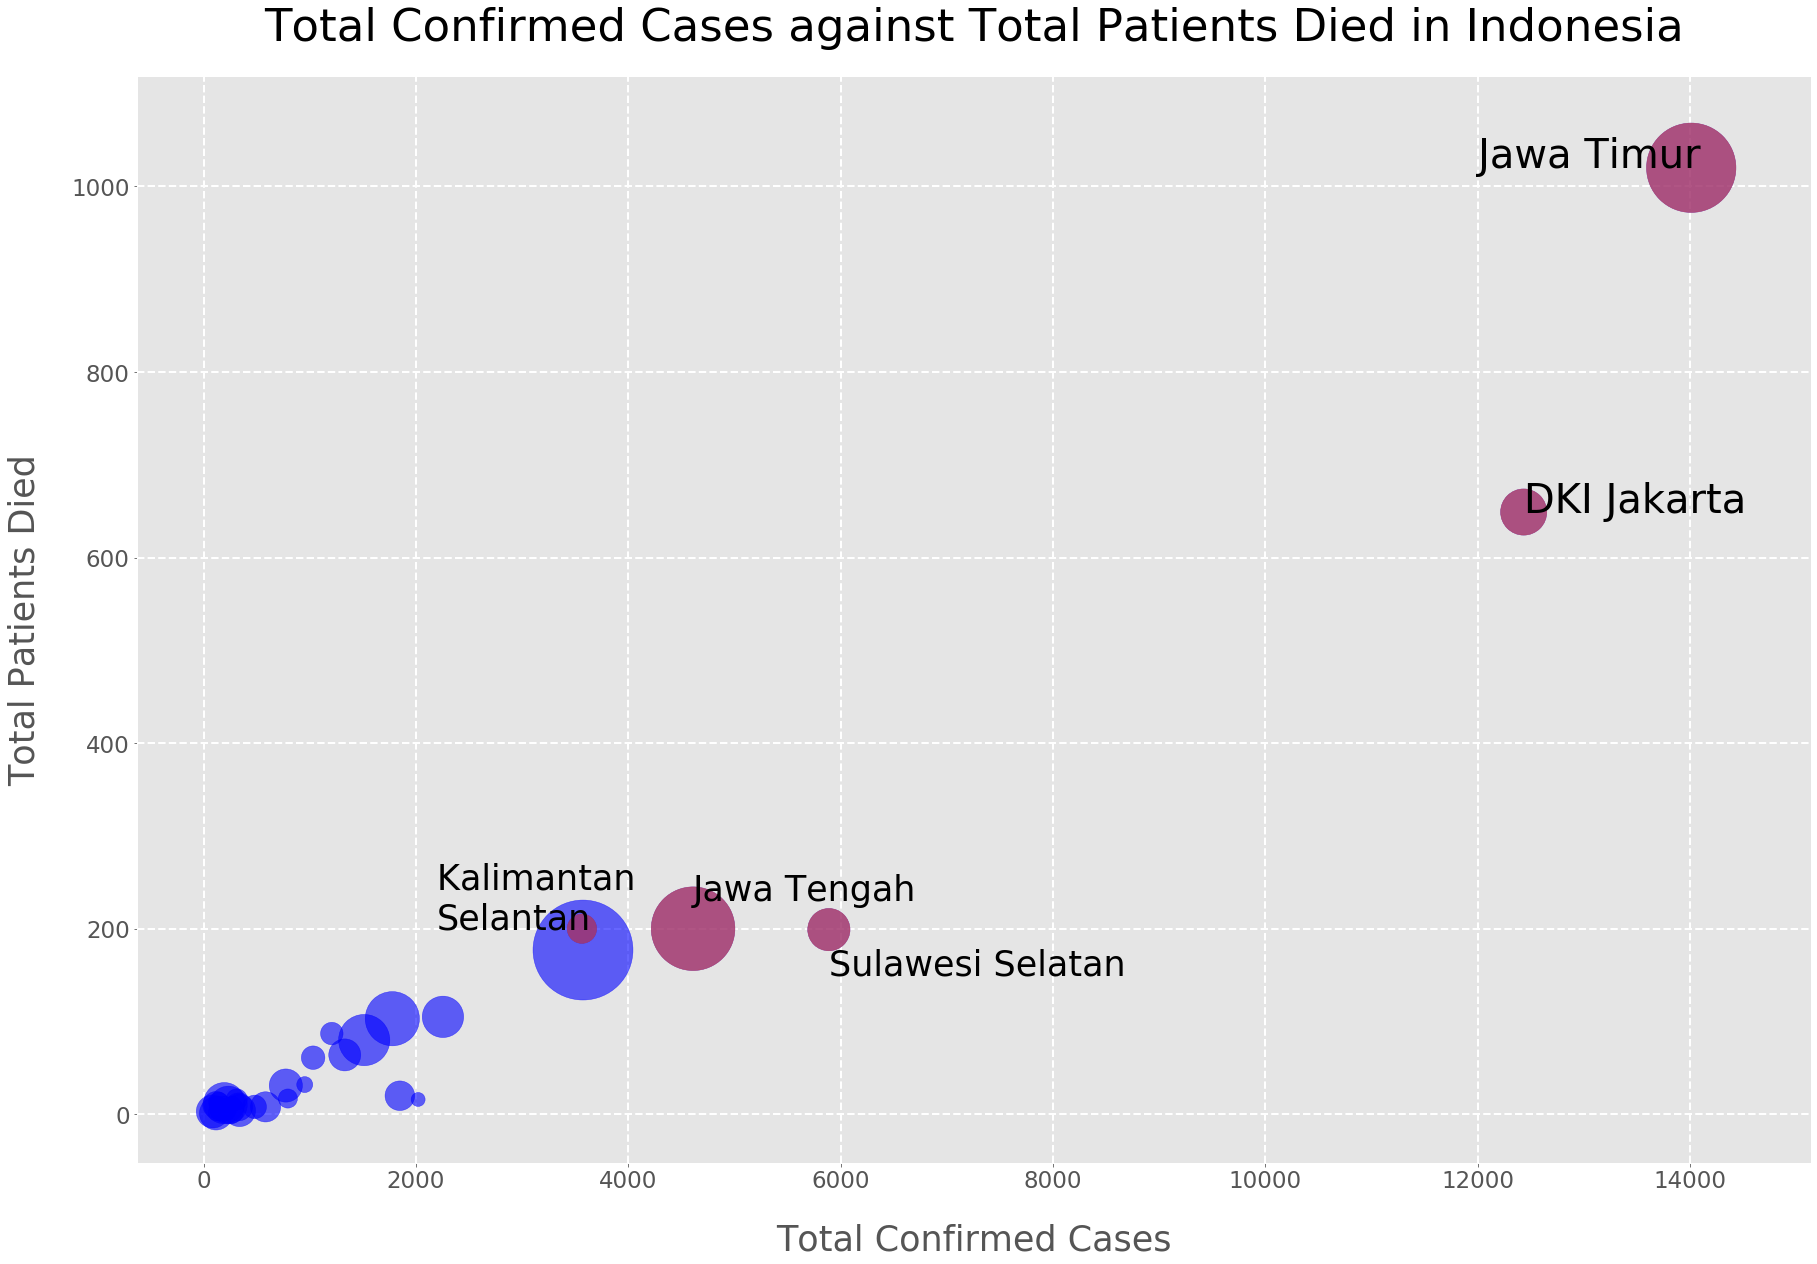

In [8]:
plt.figure(figsize = (30, 20))
plt.grid(linestyle = '--', linewidth = 2)

#To visualize the whole countries

plt.scatter(x = dacov["Confirmed_cases"], y = dacov["Death_cases"], s = dacov["Populations"]/5, 
            alpha = 0.6, c = 'b')

#To only visualize top five-country

top_five = dacov.sort_values(by = "Death_cases", ascending = False).head()

plt.scatter(x = top_five["Confirmed_cases"], y = top_five["Death_cases"], 
            s = top_five["Populations"]/5, alpha = 0.6)

plt.title("Total Confirmed Cases against Total Patients Died in Indonesia", size = 45, pad =35) #pad works as the space between the title and graph
plt.xlabel("Total Confirmed Cases", size = 35, labelpad = 30) #labelpad works as the space between the label and graph
plt.ylabel("Total Patients Died", size = 35, labelpad = 30) 

plt.xticks(size = 23)
plt.yticks(size = 23)


plt.annotate("Jawa Timur", xy = (12000, 1020), size = 40, color = 'black')
plt.annotate("DKI Jakarta", xy = (12435, 649), size = 40)
plt.annotate("Kalimantan \nSelantan", xy = (2200, 200), size = 35)
plt.annotate("Jawa Tengah", xy = (4611, 230), size = 35)
plt.annotate("Sulawesi Selatan", xy = (5890, 150), size = 35)


Although I am not going to build regression model in this notebook. However, I am going to add the regression line for this scatter plot. Firstly, I need to fetch three values to visualize my regression line namely, intercept, Y-prediction, and coefficient values.

In [9]:
regress = lm.LinearRegression()

x_var = np.array(dacov["Confirmed_cases"]) 
y_var = np.array(dacov["Death_cases"])

x_var = x_var.reshape(-1, 1)
y_var = y_var.reshape(-1, 1)

regress.fit(x_var, y_var)

print("Intercept = ", regress.intercept_)
print("Coefficient = ", regress.coef_)

y_predict = regress.predict(x_var)

Intercept =  [-22.00443314]
Coefficient =  [[0.0614732]]


After we obtained the intercept and coefficient values, we will draw the regression line in our scatter plots

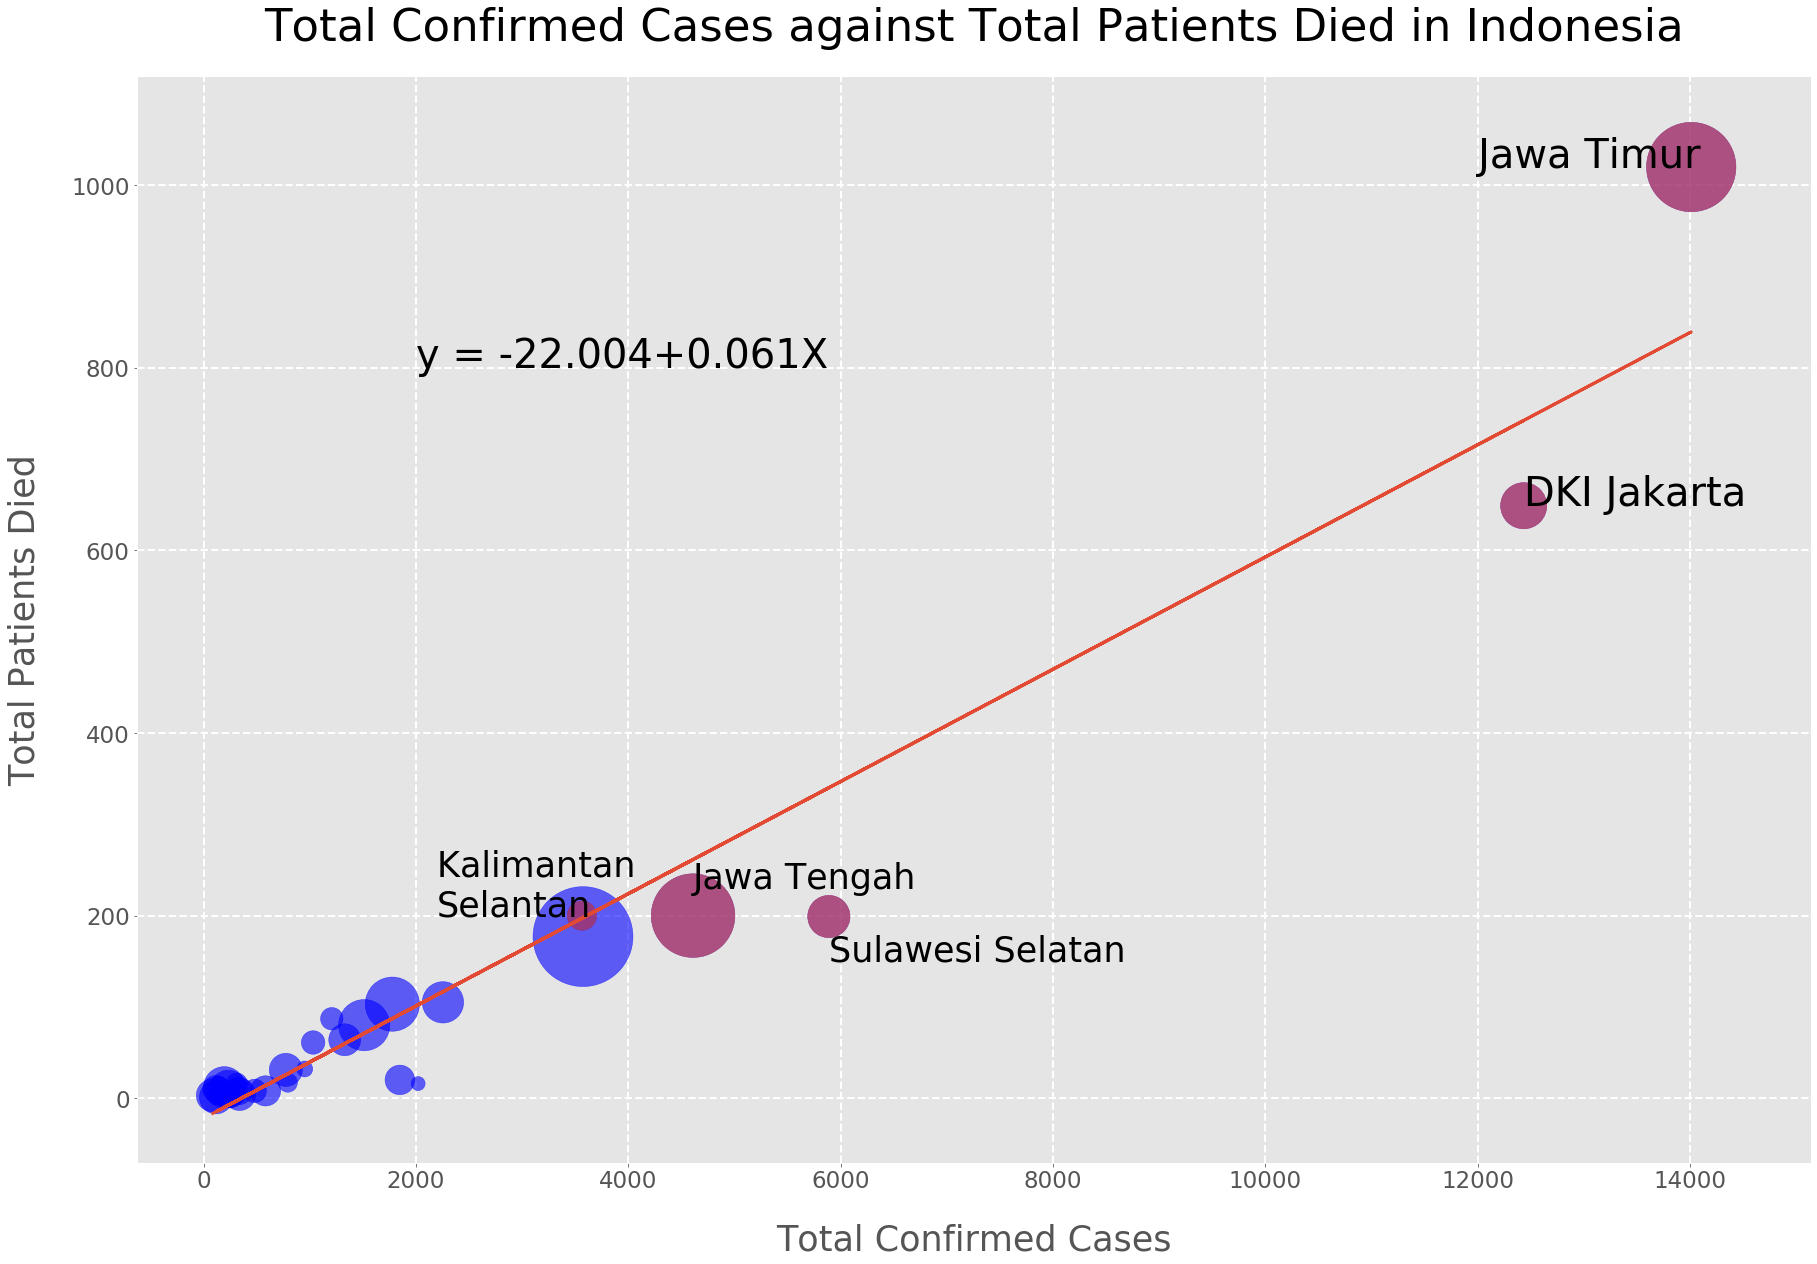

In [10]:
plt.figure(figsize = (30, 20))
plt.grid(linestyle = '--', linewidth = 2)

#To visualize the whole countries

plt.scatter(x = dacov["Confirmed_cases"], y = dacov["Death_cases"], s = dacov["Populations"]/5, 
            alpha = 0.6, c = 'b')

#To only visualize top five-country

top_five = dacov.sort_values(by = "Death_cases", ascending = False).head()

plt.scatter(x = top_five["Confirmed_cases"], y = top_five["Death_cases"], 
            s = top_five["Populations"]/5, alpha = 0.6)

plt.title("Total Confirmed Cases against Total Patients Died in Indonesia", size = 45, pad =35)  #pad works as the space between the title and graph
plt.xlabel("Total Confirmed Cases", size = 35, labelpad = 30) #labelpad works as the space between the label and graph
plt.ylabel("Total Patients Died", size = 35, labelpad = 30)   

plt.xticks(size = 23)
plt.yticks(size = 23)


plt.annotate("Jawa Timur", xy = (12000, 1020), size = 40, color = 'black')
plt.annotate("DKI Jakarta", xy = (12435, 649), size = 40)
plt.annotate("Kalimantan \nSelantan", xy = (2200, 200), size = 35)
plt.annotate("Jawa Tengah", xy = (4611, 230), size = 35)
plt.annotate("Sulawesi Selatan", xy = (5890, 150), size = 35)

plt.annotate('y = -22.004+0.061X', xy = (2000, 800), size = 40)

plt.plot(x_var, y_predict, linewidth = 3)

Since I visualized the data due to my boredom in quarantine, kindly let me know some suggestions or revisions regarding to this visualization in this nice forum, and I am looking forward to your favorable feedback. Thank you. 